In [88]:
# import bank
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from scipy import stats
from pandas.plotting import scatter_matrix



# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# Loading The Data
Here I will read in the data and print out some basic information and then take a quick look at the data.

In [41]:
# read in data
spotify_songs = pd.read_csv('datasets_1833_3172_data.csv')

print('Quick look at the data')
spotify_songs.head()

Quick look at the data


Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1             4.0    0.588       1         Redbone  Childish Gambino  
2             4.0    0.173       1    Xanny Family            Future  
3             4.0    0.230       1  Master Of None       Beach House  
4             4.0    0.904       1  Parallel Lines       Junior Boys

In [42]:
# drop unnamed
spotify_songs.drop("Unnamed: 0", axis=1, inplace=True)

# explore data
print('Info About Data:')
print('\n')
print(spotify_songs.info())
print('\n')
print('NA/blanks Output by Column:')
print('\n')
print(spotify_songs.isna().sum())

Info About Data:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4

Nice! No missing data points an all integers. Talk aout ready for Data Science!

In [43]:
spotify_songs.describe()

acousticness  danceability   duration_ms       energy  \
count   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean       0.187590      0.618422  2.463062e+05     0.681577   
std        0.259989      0.161029  8.198181e+04     0.210273   
min        0.000003      0.122000  1.604200e+04     0.014800   
25%        0.009630      0.514000  2.000150e+05     0.563000   
50%        0.063300      0.631000  2.292610e+05     0.715000   
75%        0.265000      0.738000  2.703330e+05     0.846000   
max        0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

# Explore

Below we will do some exploratory analysis on the the data set and it's features.

In [44]:
labels = ["Liked Songs","Not Liked Songs"]
values = spotify_songs['target'].value_counts().tolist()

fig = px.pie(spotify_songs, values=values, names=labels,
             title="Liked/Not-Liked Songs Distribution Pie Chart", 
             color_discrete_sequence=["purple", "blue"])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent')

In [45]:
values = spotify_songs['artist'].value_counts().tolist()[:20]
names = list(dict(spotify_songs['artist'].value_counts()).keys())[:20]

fig = go.Bar(x = names,
             y = values,
             marker = dict(color = 'lightgreen',
                         line=dict(color='black',width=1.5)))

layout = go.Layout(paper_bgcolor = 'white', plot_bgcolor = 'white')

fig = go.Figure(data = fig, layout = layout)

fig.update_layout(title_text='Top Artists')

fig.show()

Here I'll create a function to so we can look at historgrams of different types of features.

In [67]:
def plot_histo(cols, color, fig_size = (15, 20)):
    
    plt.style.use("seaborn")
    sns.set_style("white")
    
    fig, ax = plt.subplots(len(cols), 1, figsize = fig_size) 

    i = 0
    for c in cols:
        sns.histplot(x = spotify_songs[c], kde = True, ax = ax[i], color = plt_colors[i]);
        ax[i].set_xlabel(c, fontsize = 15)
        i = i + 1

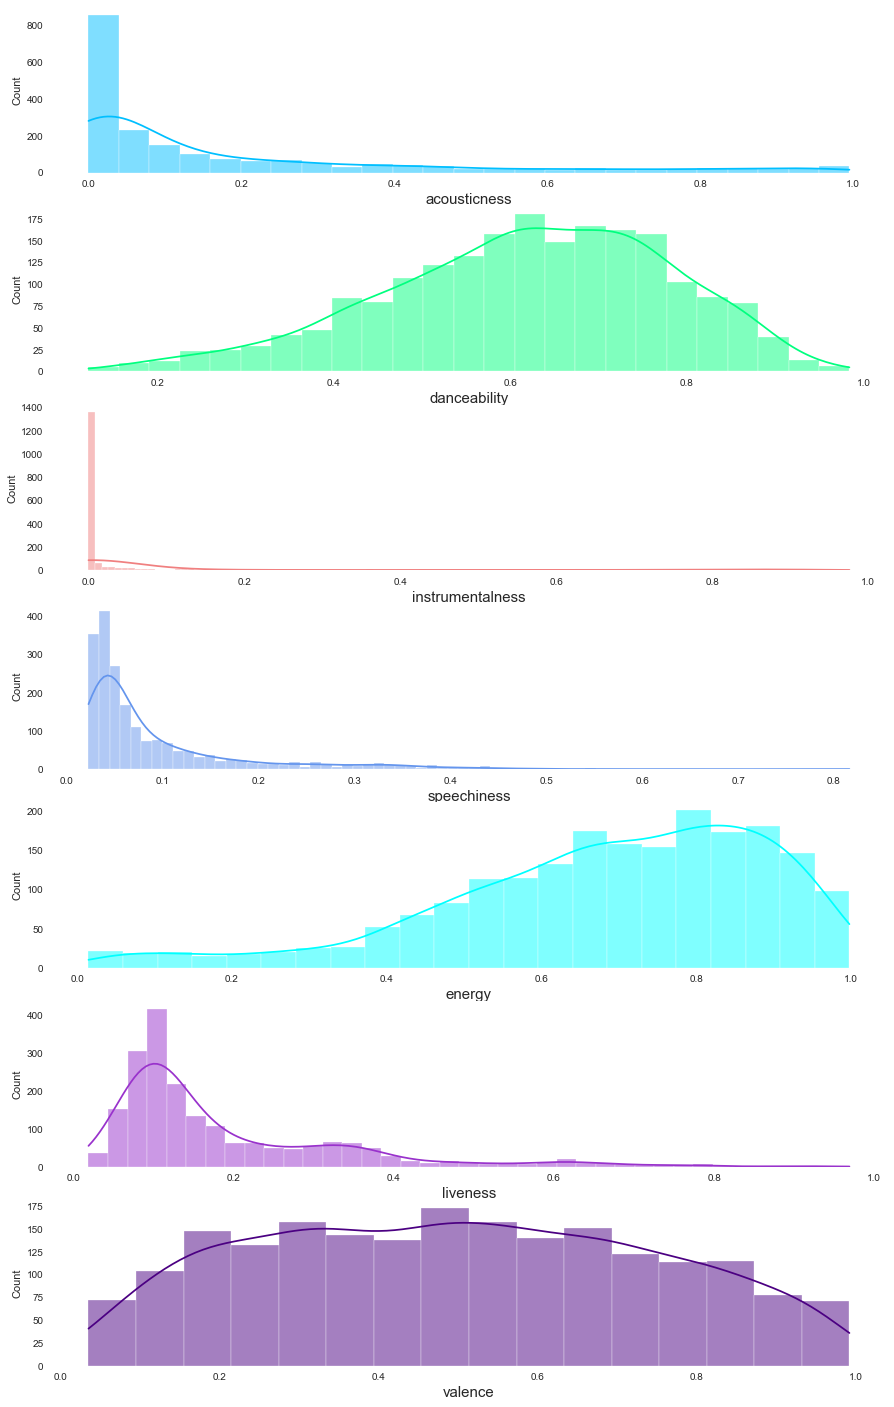

In [72]:
plt_cols = [
    'acousticness',
    'danceability',
    'instrumentalness',
    'speechiness',
    'energy',
    'liveness',
    'valence'
]

plt_colors = [
    'deepskyblue',
    'springgreen',
    'lightcoral',
    'cornflowerblue',
    'cyan',
    'darkorchid',
    'indigo'
]

plot_histo(plt_cols, plt_colors, fig_size = (15, 25))

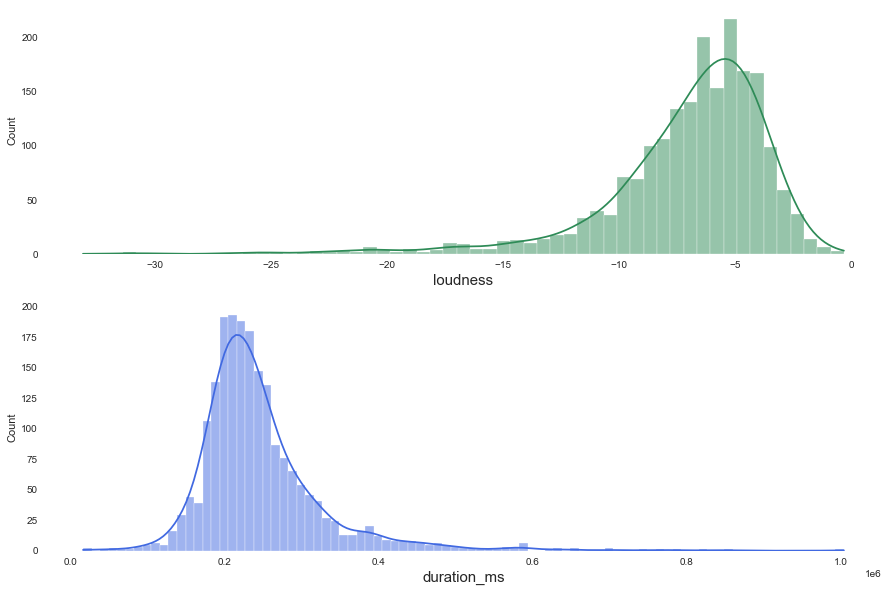

In [73]:
plt_cols = [
    'loudness',
    'duration_ms'
]

plt_colors = [
    'seagreen',
    'royalblue'
]

plot_histo(plt_cols, plt_colors, fig_size = (15, 10))

Here I will look at the distribution in comparison to the target variable

In [64]:
def plot_histo_compare(cols, palette, hue, fig_size = (15, 20)):
    
    plt.style.use("seaborn")
    sns.set_style("white")
    
    fig, ax = plt.subplots(len(cols), 1, figsize = fig_size) 

    i = 0
    
    for c in cols:
        sns.histplot(x = spotify_songs[c], kde = True, ax = ax[i], palette = palette[i], hue = hue);
        ax[i].set_xlabel(c, fontsize = 15)
        i = i + 1

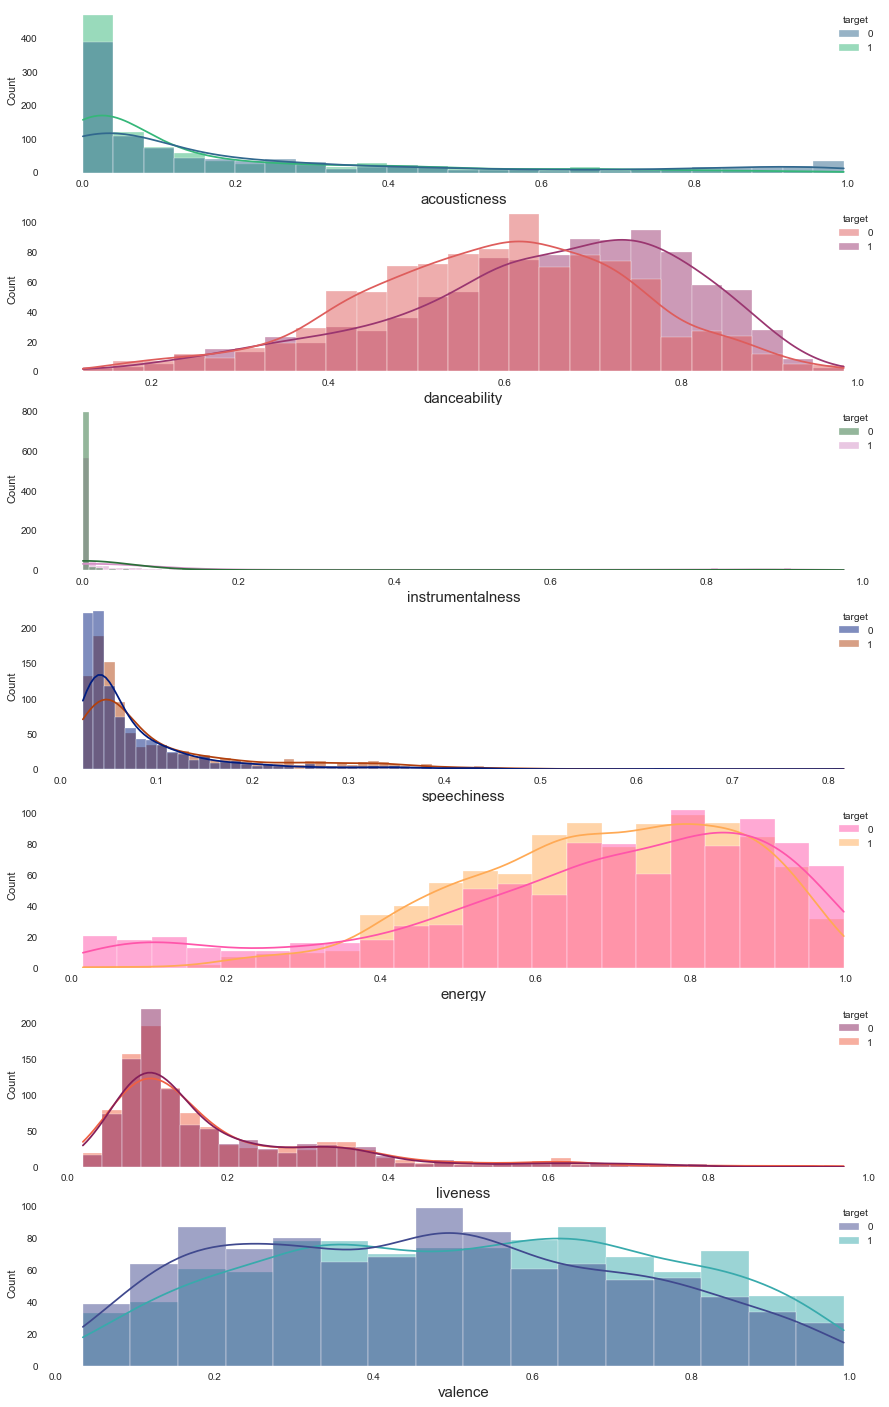

In [75]:
plt_cols = [
    'acousticness',
    'danceability',
    'instrumentalness',
    'speechiness',
    'energy',
    'liveness',
    'valence'
]
colr_palette = [
    'viridis',
    'flare',
    'cubehelix',
    'dark',
    'spring',
    'rocket',
    'mako',
    'seagreen'
]

plot_histo_compare(cols = plt_cols, palette = colr_palette,
                   hue = spotify_songs['target'], fig_size = (15, 25))

Here I will look at the relationship between variables.

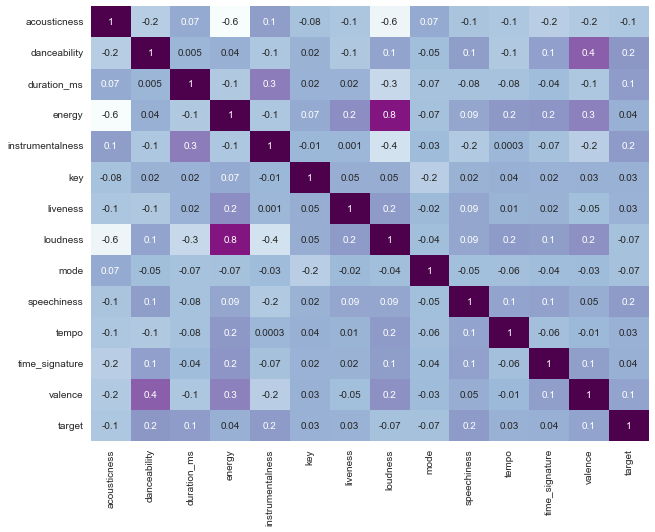

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(spotify_songs.corr(), annot=True, fmt='.1g', cmap="BuPu", cbar=False);

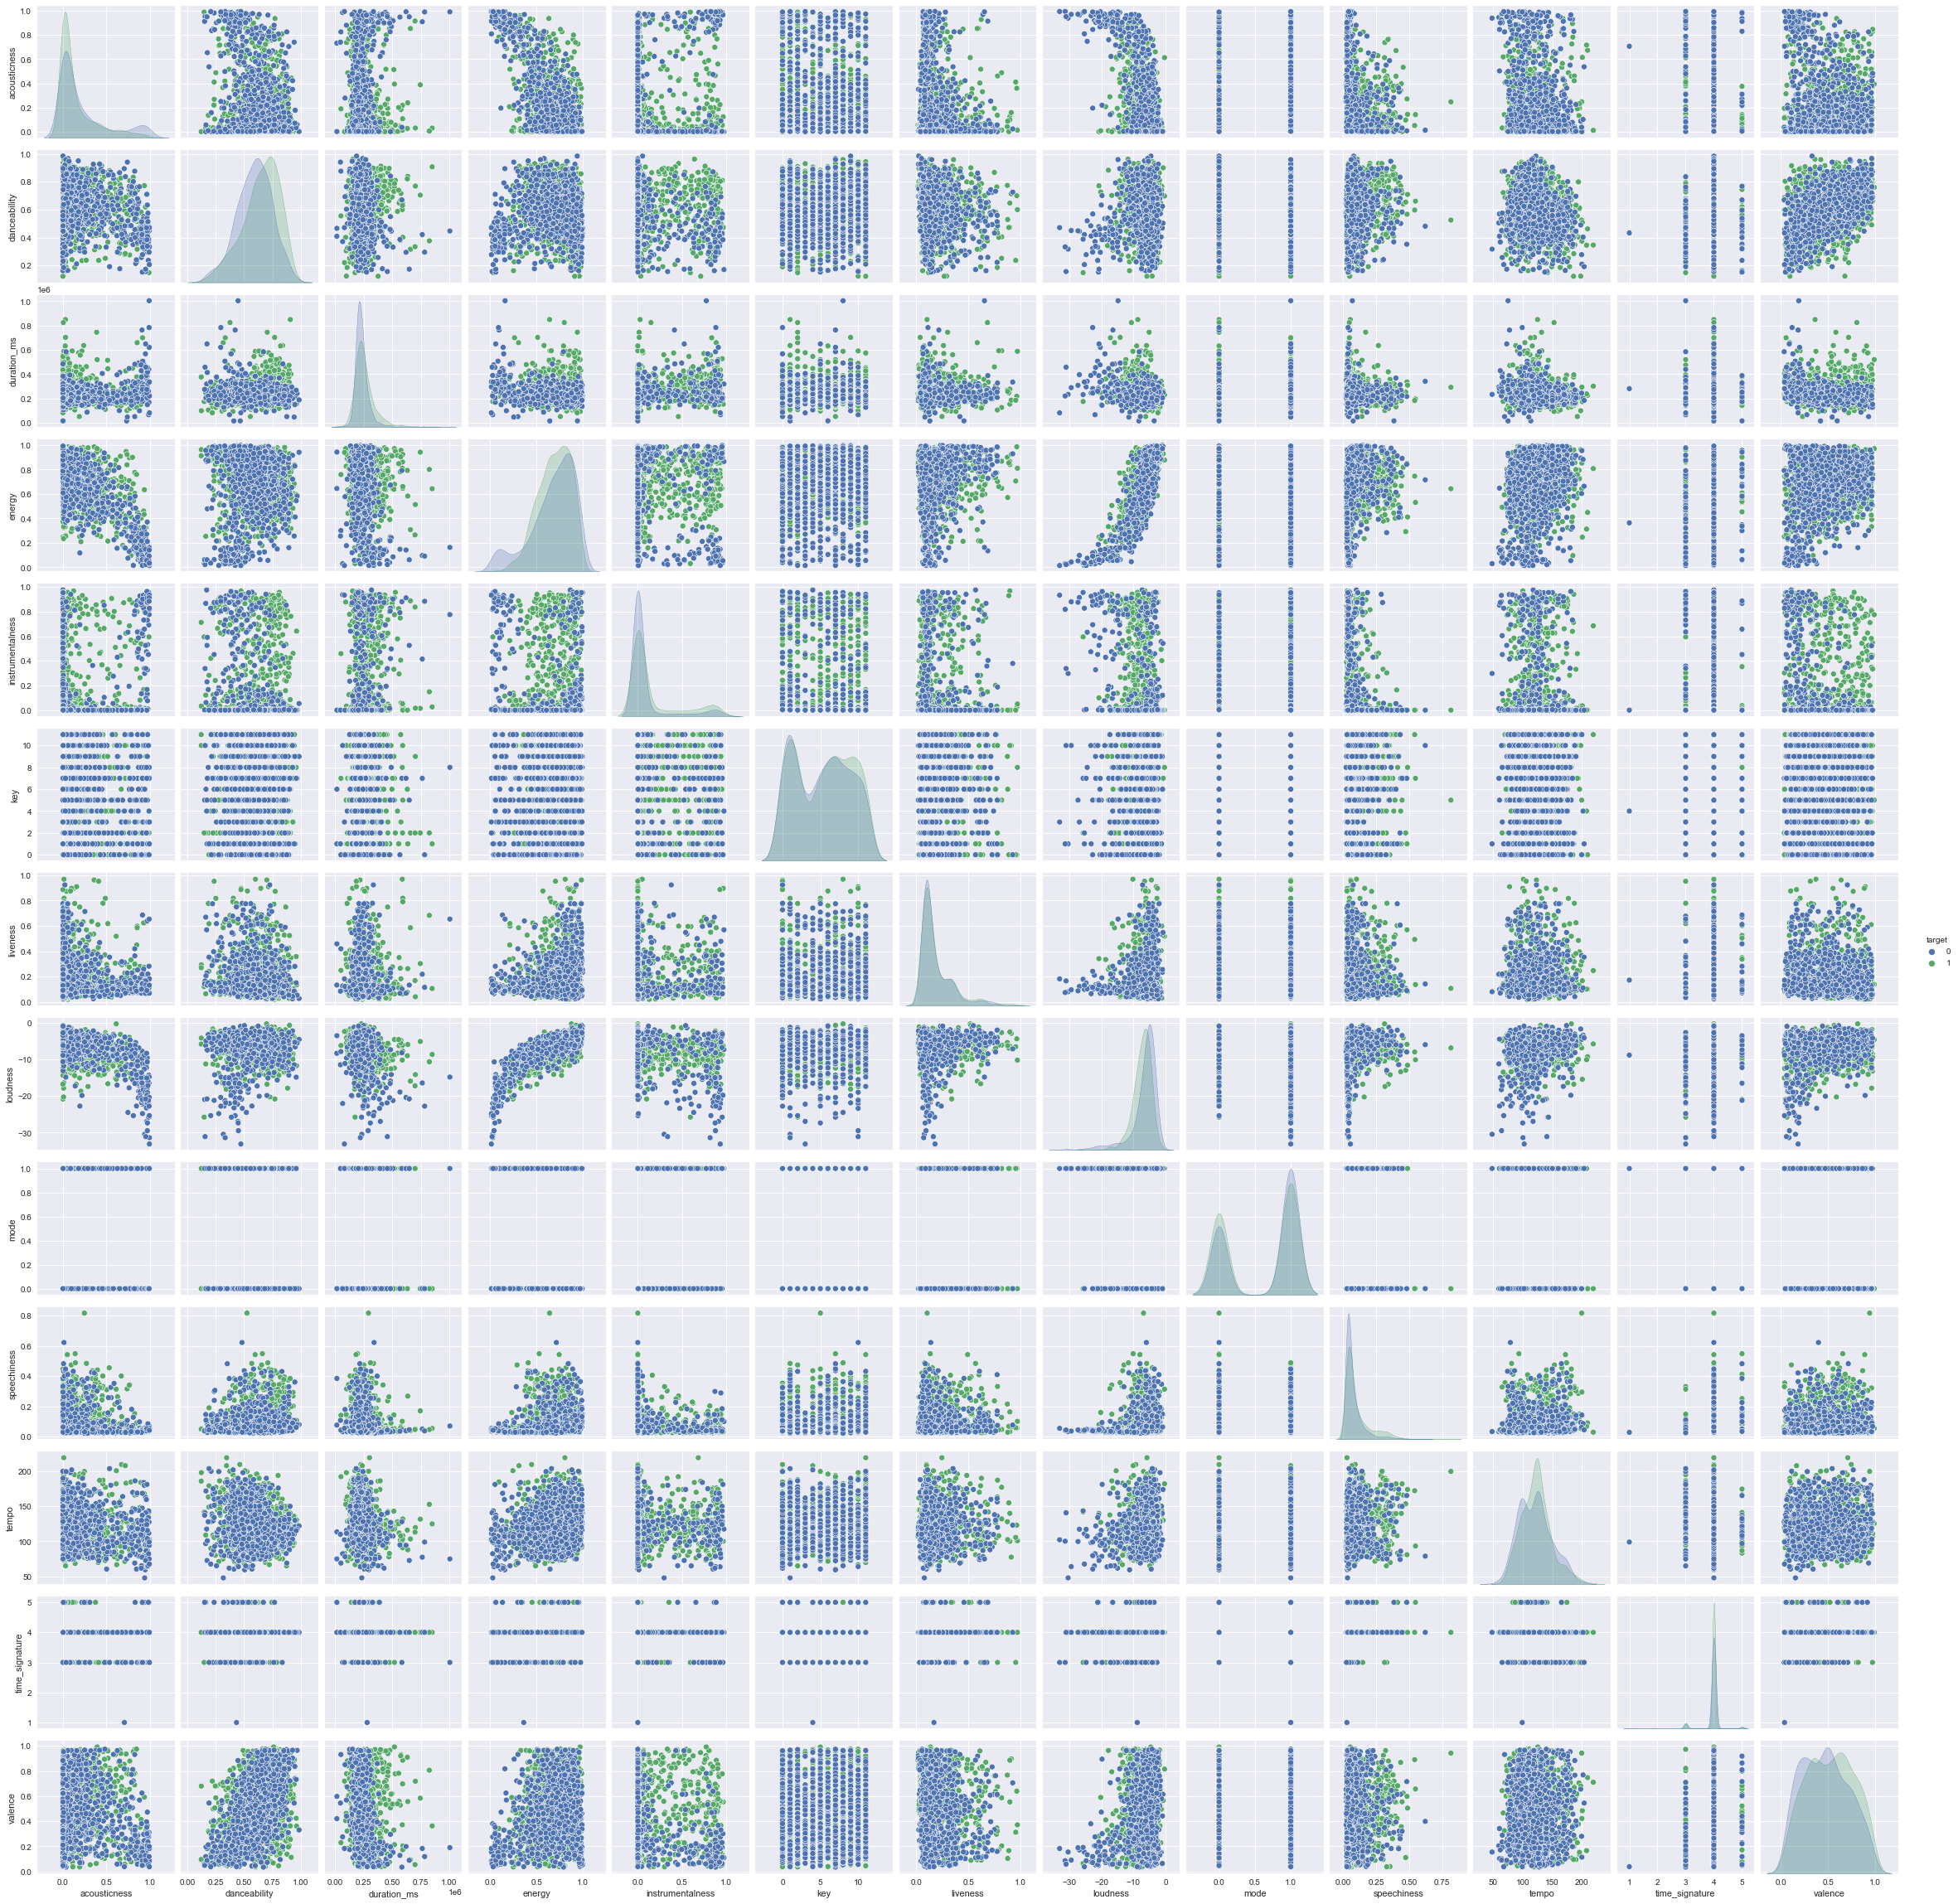

In [87]:
sns.pairplot(spotify_songs, hue="target")

In [55]:
spotify_songs.columns[spotify_songs.columns != 'target']

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'song_title',
       'artist'],
      dtype='object')

In [ ]:

for c in plt_cols:
    liked = spotify_songs[spotify_songs[c]!= 0]
not_liked = spotify_songs[spotify_songs['glucose']!= 0]
print(stats.describe(spotify_songs['glucose']))
print(stats.describe(spotify_songs['glucose']))

# Analysis

I like the variable `danceability` so I'm going to focus on that.

My hypothesis is that this person on average likes songs that have more dancibly because who doesn't like to Dance?!?!

In [96]:
# Split up the dataset
liked_dance = spotify_songs[(spotify_songs['target'] == 1)]
not_liked_dance = spotify_songs[(spotify_songs['target'] == 0)]
print(stats.describe(liked_dance['danceability']))
print(stats.describe(not_liked_dance['danceability']))

DescribeResult(nobs=1020, minmax=(0.122, 0.962), mean=0.6465470588235295, variance=0.02660433242509958, skewness=-0.6504751494659127, kurtosis=-0.030967299729999898)
DescribeResult(nobs=997, minmax=(0.152, 0.984), mean=0.5896479438314945, variance=0.023627937176992825, skewness=-0.2513353326742796, kurtosis=-0.09673696427894285)
